In [5]:
import pandas as pd

df = pd.read_csv('/Users/ml/Desktop/ViewingActivity.csv')
df.shape

(200, 10)

In [6]:
df.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,2013-03-20 5:17:53,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)


In [7]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head(1)

,Start Time,Duration,Title
0,2013-03-20 5:17:53,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...


In [8]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [9]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [10]:
df = df.set_index('Start Time')

df.index = df.index.tz_convert('US/Eastern')

df = df.reset_index()

df.head(1)

,Start Time,Duration,Title
0,2013-03-20 01:17:53-04:00,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...


In [11]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, US/Eastern]
Duration                 timedelta64[ns]
Title                             object
dtype: object

In [13]:
startrek = df[df['Title'].str.contains('Star Trek: Deep Space Nine', regex=False)]

In [14]:
startrek.shape

(43, 3)

In [15]:
startrek = startrek[(startrek['Duration'] > '0 days 00:01:00')]
startrek.shape

(38, 3)

In [16]:
startrek['Duration'].sum()

Timedelta('0 days 20:00:57')

In [17]:
startrek['weekday'] = startrek['Start Time'].dt.weekday
startrek['hour'] = startrek['Start Time'].dt.hour

startrek.head(1)

,Start Time,Duration,Title,weekday,hour
1,2013-03-20 00:27:45-04:00,0 days 00:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...,2,0


In [18]:
%matplotlib inline
import matplotlib

<AxesSubplot:title={'center':'Trek Episodes Watched by Day'}>

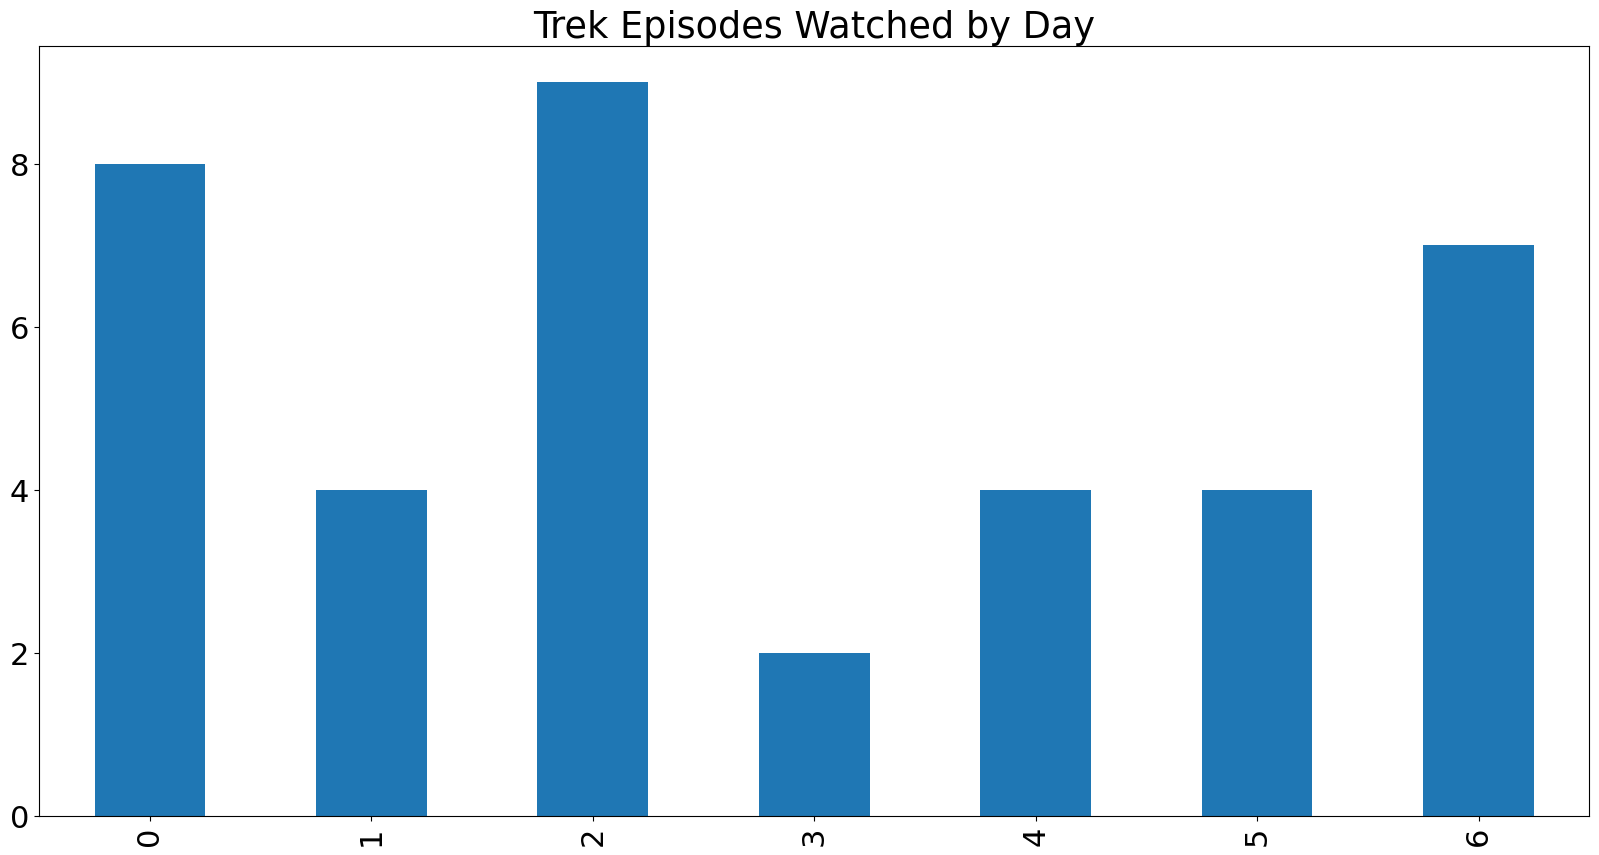

In [19]:
startrek['weekday'] = pd.Categorical(startrek['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

startrek_by_day = startrek['weekday'].value_counts()

startrek_by_day = startrek_by_day.sort_index()

matplotlib.rcParams.update({'font.size': 22})

startrek_by_day.plot(kind='bar', figsize=(20,10), title='Trek Episodes Watched by Day')

<AxesSubplot:title={'center':'DS9 Episodes Watched by Hour'}>

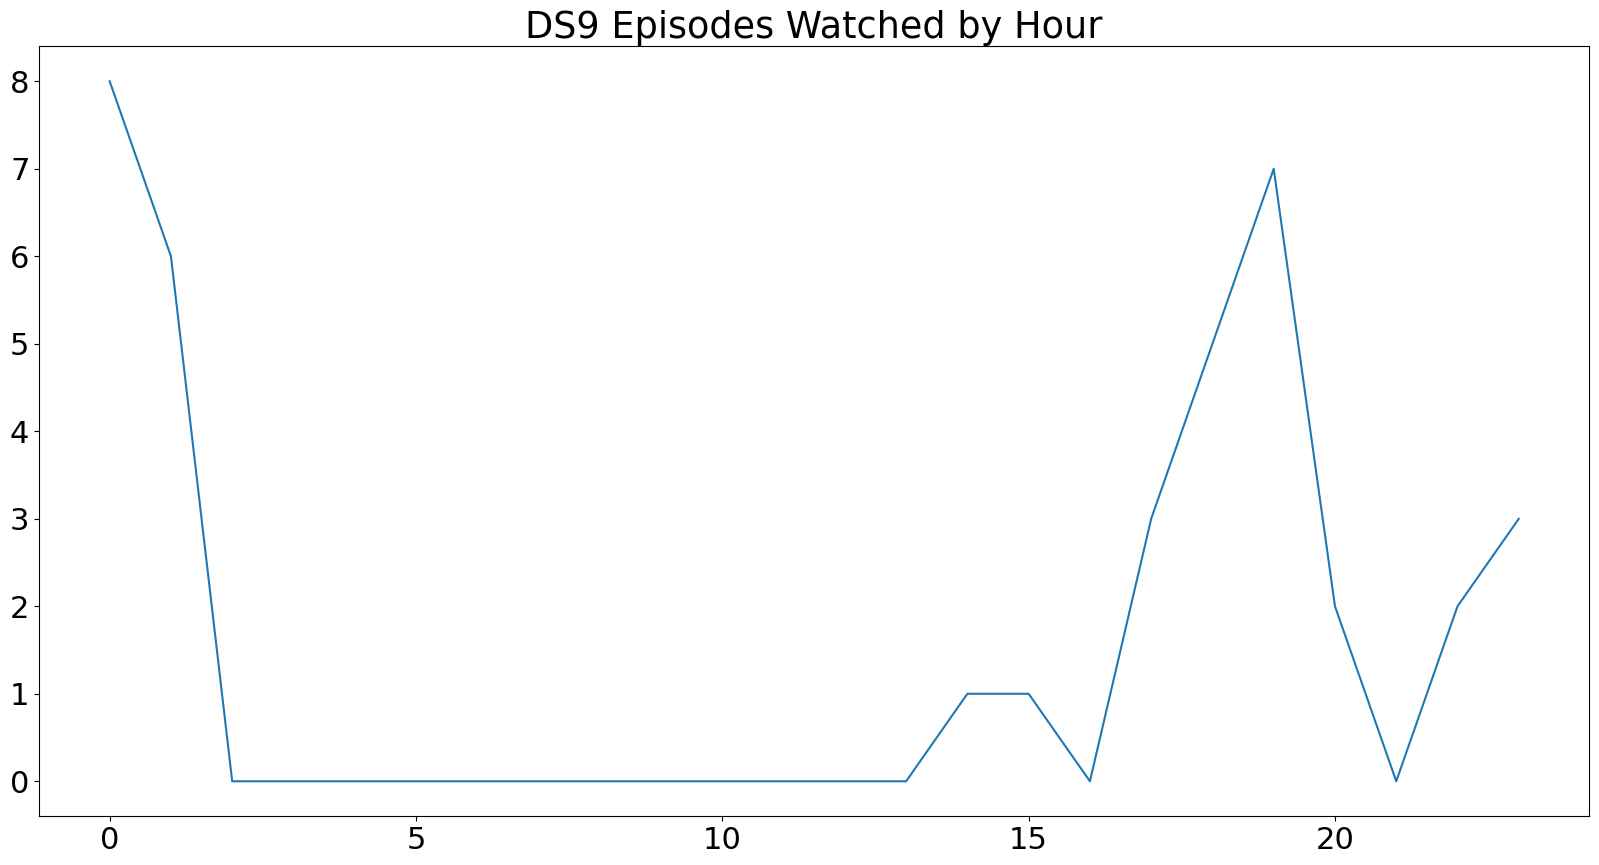

In [33]:
startrek['hour'] = pd.Categorical(startrek['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

startrek_by_hour = startrek['hour'].value_counts()

startrek_by_hour = startrek_by_hour.sort_index()

startrek_by_hour.plot(kind='line', figsize=(20,10), title='DS9 Episodes Watched by Hour')

<AxesSubplot:title={'center':'Frequency of Multiple Episodes Watched'}, ylabel='Frequency'>

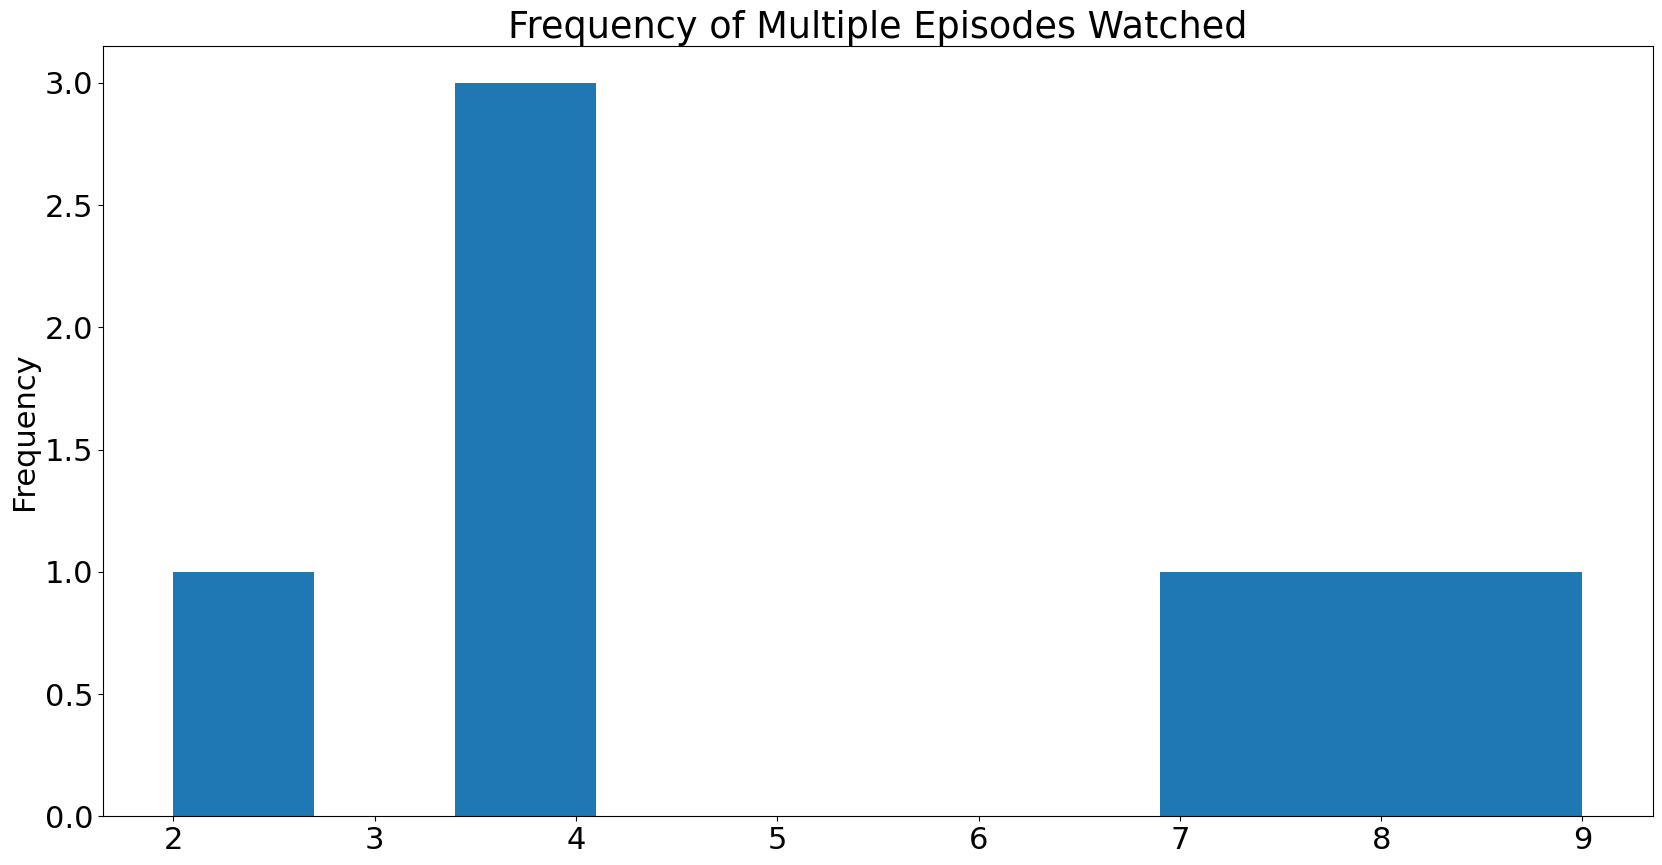

In [38]:
startrek['weekday'] = pd.Categorical(startrek['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

startrek_by_day = startrek['weekday'].value_counts()

startrek_by_day = startrek_by_day.sort_index()

matplotlib.rcParams.update({'font.size': 22})

startrek_by_day.plot(kind='hist', figsize=(20,10), title='Frequency of Multiple Episodes Watched')